In [1]:
import numpy as np
import pandas as pd
from calendar import monthrange
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path

In [3]:
holidays=pd.read_csv('holidays_events.csv')
oil=pd.read_csv('oil.csv')
stores=pd.read_csv('stores.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
transactions=pd.read_csv('transactions.csv')

In [4]:
test1=pd.read_csv('test.csv') 

In [12]:
m1=pd.(holidays,oil,on="date")
m2=pd.merge(train,stores)
m3=pd.merge(m2,transactions)
df=pd.merge(m3,m1,on="date")

AttributeError: module 'pandas' has no attribute 'join'

In [ ]:
m1

In [6]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,transactions,type_y,locale,locale_name,description,transferred,dcoilwtico


In [7]:
df.shape

(322047, 17)

In [8]:
df.loc[(df.dcoilwtico.isnull()),'dcoilwtico']=df.dcoilwtico.mean()

In [9]:
from datetime import datetime
df['new_date']=pd.to_datetime(df['date'],format='%Y-%m-%d',errors='coerce')

<AxesSubplot:xlabel='new_date', ylabel='sales'>

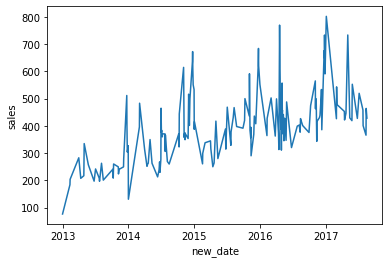

In [10]:
#Time Series plot of the sales data
sns.lineplot(x='new_date',y='sales',data=df,ci=None,estimator='mean')

In [11]:
df[["year", "month", "day"]] = df["date"].str.split("-", expand = True)
df['month'].replace(['01','02','03','04','05','06','07','08','09','10','11','12'],['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],inplace=True)
df['month'] = pd.Categorical(df['month'],
                                   categories=['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],
                                   ordered=True)
df['day'] = pd.Categorical(df['day'],categories=['01','02','03','04','05','06','07','08','09','10','11', '12', '14','15','16','17','18','19','20','21','22','23', '24', '25', '26', '27','28','29','30','31'],ordered=True)       

<AxesSubplot:xlabel='month', ylabel='sales'>

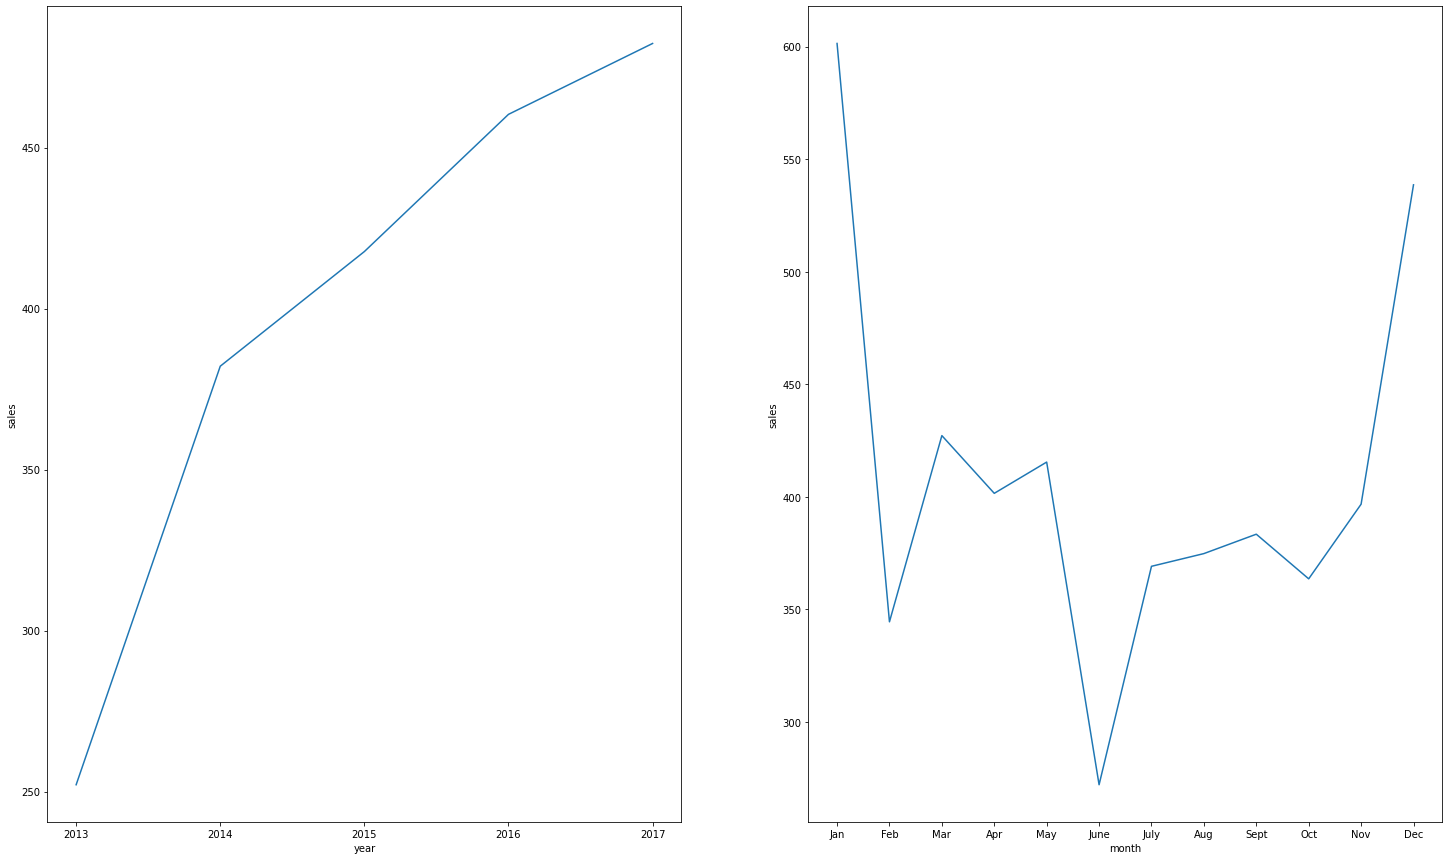

In [12]:
f,ax=plt.subplots(1,2,figsize=(25,15))
sns.lineplot(x='year',y='sales',data=df,ci=None,estimator='mean',ax=ax[0])
sns.lineplot(x='month',y='sales',data=df,ci=None,estimator='mean',ax=ax[1])

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.loc[:, train.columns != 'sales'], train['sales'], test_size=0.33, random_state=42)

In [14]:
X_train

,id,date,store_nbr,family,onpromotion
386049,386049,2013-08-05,40,HOME AND KITCHEN I,0
370005,370005,2013-07-27,40,DELI,0
1106752,1106752,2014-09-15,12,SCHOOL AND OFFICE SUPPLIES,1
459265,459265,2013-09-15,45,BOOKS,0
2849710,2849710,2017-05-23,17,POULTRY,0
...,...,...,...,...,...
1692743,1692743,2015-08-10,54,DAIRY,0
2356330,2356330,2016-08-18,23,SCHOOL AND OFFICE SUPPLIES,0
2229084,2229084,2016-06-07,53,AUTOMOTIVE,0
2768307,2768307,2017-04-07,33,BEVERAGES,15


## XGBoost

In [15]:
from xgboost import XGBRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# one-hot encode the categorical features
cat_attribs = ['id','date','family']
full_pipeline = ColumnTransformer([('cat', OneHotEncoder(handle_unknown='ignore'), cat_attribs)], remainder='passthrough')

encoder = full_pipeline.fit(X_train)
X_train = encoder.transform(X_train)
X_test = encoder.transform(X_test)
test=encoder.transform(test)

model = XGBRegressor(n_estimators=10, max_depth=20, verbosity=2)
model.fit(X_train, y_train)
model.predict(X_train)

predictions = model.predict(X_test)


[14:44:28] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 16274 extra nodes, 0 pruned nodes, max_depth=20
[14:46:33] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 19292 extra nodes, 0 pruned nodes, max_depth=20
[14:48:26] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 18294 extra nodes, 0 pruned nodes, max_depth=20
[14:49:59] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 15536 extra nodes, 0 pruned nodes, max_depth=20
[14:51:11] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end, 12958 extra nodes, 0 pruned nodes, max_depth=20
[14:52:04] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/tree/updater_prune.cc:101: tree pruning end

In [16]:
from sklearn.metrics import mean_squared_error
from numpy import sqrt 
rms = sqrt(mean_squared_error(y_test, predictions))

In [17]:
rms

431.58303383525725

In [18]:
pred=pd.DataFrame(predictions)
pred.rename(columns={0:'sales'},inplace=True)
pred

,sales
0,2532.201416
1,1.370739
2,186.253555
3,11.945758
4,78.381905
...,...
990289,52.062557
990290,72.073067
990291,3.488681
990292,4.541381


In [19]:
pred["Actual"] = y_test.values
pred

,sales,Actual
0,2532.201416,2576.000000
1,1.370739,0.000000
2,186.253555,357.354000
3,11.945758,5.000000
4,78.381905,0.000000
...,...,...
990289,52.062557,83.216000
990290,72.073067,55.404003
990291,3.488681,0.000000
990292,4.541381,0.000000


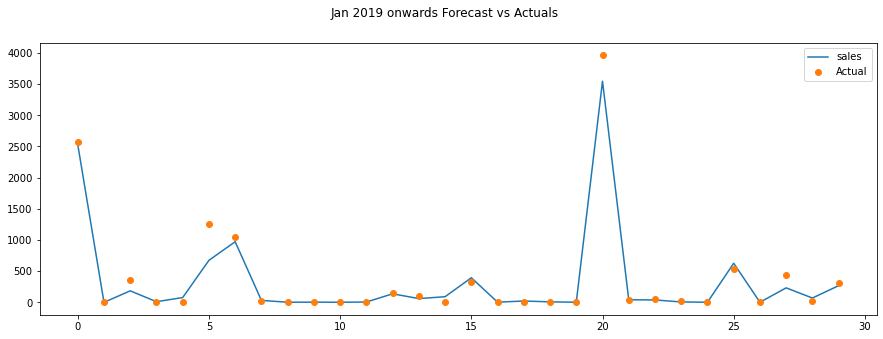

In [20]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
_ = pred[["sales","Actual"]][0:30].plot(ax=ax, style=["-","o"])
plot = plt.suptitle("Jan 2019 onwards Forecast vs Actuals")

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [22]:
pred['sales']

0         2532.201416
1            1.370739
2          186.253555
3           11.945758
4           78.381905
             ...     
990289      52.062557
990290      72.073067
990291       3.488681
990292       4.541381
990293     248.448242
Name: sales, Length: 990294, dtype: float32

In [23]:
y_test

2483653    2576.000000
2761877       0.000000
1217988     357.354000
1231938       5.000000
528175        0.000000
              ...     
2791862      83.216000
1691971      55.404003
1611776       0.000000
1963121       0.000000
449204       93.000000
Name: sales, Length: 990294, dtype: float64

In [24]:
#mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, pred['sales'])

4.3298187783044584e+16

In [25]:
mean_absolute_error(y_test, pred['sales'])

114.10646690985605

In [26]:
mean_squared_error(y_test, pred['sales'])

186263.9150944448

In [27]:
max(y_test) - min(y_test)

87438.516

In [28]:
NormalizedRMSE = rms / (max(pred['sales']) - min(pred['sales']))
NormalizedRMSE

0.02312521666274919

## Arima

In [29]:
holidays2=pd.read_csv('holidays_events.csv')
oil2=pd.read_csv('oil.csv')
stores2=pd.read_csv('stores.csv')
test2=pd.read_csv('test.csv')
train2=pd.read_csv('train.csv')
transactions2=pd.read_csv('transactions.csv')

In [30]:
from random import sample

train2 = train2.sample(n=100000)

In [31]:
train2, val2 = train_test_split(train2, test_size=0.2, random_state=1)

In [32]:
val2

,id,date,store_nbr,family,sales,onpromotion
856376,856376,2014-04-27,37,PET SUPPLIES,0.000,0
1348319,1348319,2015-01-29,40,BREAD/BAKERY,314.000,3
1813968,1813968,2015-10-17,6,MEATS,494.525,0
471313,471313,2013-09-22,33,CLEANING,1131.000,0
1941250,1941250,2015-12-29,27,PERSONAL CARE,263.000,0
...,...,...,...,...,...,...
133625,133625,2013-03-16,9,DAIRY,454.000,0
432488,432488,2013-08-31,43,MAGAZINES,0.000,0
429205,429205,2013-08-29,51,CLEANING,975.000,0
1982152,1982152,2016-01-21,25,CLEANING,402.000,6


In [33]:
train2['date'] = pd.to_datetime(train2['date'])
train2['date'] = train2.date.dt.to_period('D')
val2['date'] = pd.to_datetime(val2['date'])
val2['date'] = val2.date.dt.to_period('D')

In [34]:
train2 = train2.set_index(['store_nbr', 'family', 'date']).sort_index()
val2 = val2.set_index(['store_nbr', 'family', 'date']).sort_index()
train2.head(), val2.head()

(                                     id  sales  onpromotion
 store_nbr family     date                                  
 1         AUTOMOTIVE 2013-01-06    8910    2.0            0
                      2013-01-09   14256    2.0            0
                      2013-01-11   17820    3.0            0
                      2013-01-15   24948    1.0            0
                      2013-04-10  176418    3.0            0,
                                       id  sales  onpromotion
 store_nbr family     date                                   
 1         AUTOMOTIVE 2013-07-26   367092    4.0            0
                      2014-06-09   931986    0.0            0
                      2014-09-26  1126224    1.0            0
                      2015-07-05  1626966    0.0            0
                      2015-07-30  1671516    1.0            0)

In [35]:
Total_sales2 = train2.groupby('date').sum().squeeze().loc['2017']
Total_sales2

,id,sales,onpromotion
date,,,
2017-01-01,119482388,0.000000,0
2017-01-02,155938777,61496.754000,552
2017-01-03,124840470,21457.258000,300
2017-01-04,135339420,18714.629960,467
2017-01-05,109383841,13527.847999,63
...,...,...,...
2017-08-11,104754861,15670.865000,355
2017-08-12,140749930,16527.266000,154
2017-08-13,173791952,36410.627975,249


In [36]:
Total_sales_test2 = val2.drop('id', axis = 1).groupby('date').sum().squeeze().loc['2017']
Total_sales_test2

,sales,onpromotion
date,,
2017-01-01,0.000,0
2017-01-02,11996.495,79
2017-01-03,3208.742,179
2017-01-04,15884.453,474
2017-01-05,2903.228,42
...,...,...
2017-08-11,12160.033,57
2017-08-12,5694.483,16
2017-08-13,15395.000,82


predicted=13667.063387, expected=16839.846000
predicted=19269.172087, expected=16125.097000
predicted=16523.431145, expected=23210.595002
predicted=18502.549295, expected=13189.502100
predicted=15726.254786, expected=35735.154000
predicted=22037.340679, expected=33491.529003
predicted=23329.028156, expected=28273.577000
predicted=22578.687254, expected=11865.151988
predicted=21061.122074, expected=37089.452000
predicted=27884.401142, expected=22030.634000
predicted=27280.378549, expected=7874.548990
predicted=20943.547117, expected=21297.478000
predicted=25909.995492, expected=40285.587960
predicted=24344.726984, expected=29858.115000
predicted=26974.237390, expected=23042.459000
predicted=23483.059638, expected=16051.914003
predicted=19087.981811, expected=15187.146000
predicted=21678.036566, expected=28896.390000
predicted=30788.646224, expected=41211.595000
predicted=29968.287704, expected=15811.337996
predicted=18561.125309, expected=18334.313003
predicted=21781.479746, expected=15

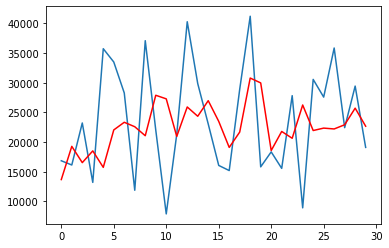

In [37]:

X = Total_sales2["sales"].values
size = int(len(X) * 0.66)
train2, test2 = X[0:size], X[size:len(X)]
history2 = [x for x in train2]
predictions2 = list()
# walk-forward validation
from statsmodels.tsa.arima.model import ARIMA
for t in range(len(test2)):
    model = ARIMA(history2, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions2.append(yhat)
    obs = test2[t]
    history2.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse2 = sqrt(mean_squared_error(test2, predictions2))
print('Test RMSE: %.3f' % rmse2)
# plot forecasts against actual outcomes
plt.plot(test2[0:30])
plt.plot(predictions2[0:30], color='red')
plt.show()

In [38]:
history2

[0.0,
 61496.75400000001,
 21457.258,
 18714.629960000002,
 13527.8479995,
 11456.793004,
 34971.527,
 27872.441966000002,
 17732.577999999998,
 12554.621996000002,
 16444.682999999997,
 24052.474,
 25755.590998,
 42943.113,
 18360.316,
 16903.861,
 13536.48102,
 11816.900999999998,
 12848.214,
 14472.484019999998,
 33102.40001,
 14219.013,
 21013.506999999998,
 7715.05497,
 11251.2489997,
 24767.556,
 24912.910996,
 22468.03999,
 26444.961,
 15560.058,
 10076.057995,
 17888.483,
 7969.45998,
 22952.732016,
 65184.14202,
 46979.31100000001,
 20194.036,
 6904.312,
 11813.65799,
 17823.136999999995,
 28981.751,
 28567.74,
 31830.322000000004,
 20103.950999999997,
 27209.616999999995,
 19338.239,
 13751.289,
 13708.709,
 12460.386,
 26780.459,
 18062.984,
 32817.38601,
 19805.657000000003,
 20588.038,
 35545.81,
 42973.138999999996,
 12625.468,
 16053.90099,
 27086.066003999997,
 36728.23300200001,
 15854.711,
 18475.558999,
 52064.415,
 32521.025999999998,
 7765.5650000000005,
 21782.13,

In [39]:
test2

array([16839.846   , 16125.097   , 23210.595002, 13189.5021  ,
       35735.154   , 33491.529003, 28273.577   , 11865.151988,
       37089.452   , 22030.634   ,  7874.54899 , 21297.478   ,
       40285.58796 , 29858.115   , 23042.459   , 16051.914003,
       15187.146   , 28896.39    , 41211.595   , 15811.337996,
       18334.313003, 15556.852998, 27818.700974,  8898.352   ,
       30559.816003, 27575.047   , 35854.479004, 22420.824   ,
       29432.890002, 19094.064   ,  6862.592   , 15528.012   ,
       31340.6088  , 28024.48601 , 16394.66998 , 22054.081   ,
       21920.34703 , 15866.464   , 25817.946   , 31121.646   ,
       23005.223   , 21027.20697 , 20649.006   , 18023.958991,
       13785.413   , 19638.895   , 18675.795   , 38931.156   ,
       21249.937   , 32761.10197 , 12177.162   , 17318.698   ,
       12012.705   , 34538.447005, 22206.202   , 10905.940995,
       23839.85    , 15983.295   , 15448.477   , 26297.856   ,
       19151.369975, 18118.865899, 26869.292   , 14856.

In [40]:
#mean_absolute_percentage_error
mean_absolute_percentage_error(test2, predictions2)

0.47912644937757104

In [41]:
min(predictions2)

13091.909959796008

In [42]:
NormalizedRMSE2 = rmse2 / (max(predictions2) - min(predictions2))
NormalizedRMSE2

0.3865996127704094

## Random Forest

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [44]:
holidays=pd.read_csv('holidays_events.csv')
oil=pd.read_csv('oil.csv')
stores=pd.read_csv('stores.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
transactions=pd.read_csv('transactions.csv')

In [45]:
#train["date"].value_counts()

In [46]:
#holidays["date"].value_counts()

In [47]:
# train['date'] = pd.to_datetime(train['date'])
# holidays['date'] = pd.to_datetime(holidays['date'])

In [48]:
#train["date"].isin(holidays['date']).value_counts()

In [49]:
# x =train.merge(holidays, how='left')
x = pd.merge(train,
                 holidays,
                 on='date', 
                 how='left')

In [50]:
x

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [51]:
x["type"].value_counts()

Holiday       304722
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: type, dtype: int64

In [52]:
m1=pd.merge(holidays,oil)
m2=pd.merge(train,stores)
m3=pd.merge(m2,transactions)
df=pd.merge(m3,m1,on="date")

In [53]:
df['date'] = pd.to_datetime(train['date'])
df['date'] = pd.to_datetime(test['date'])
df['Date_dayofweek'] =df['date'].dt.dayofweek
df['Date_month'] =df['date'].dt.month 
df['Date_year'] =df['date'].dt.year
df['Date_day'] =df['date'].dt.day 

In [54]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,type_y,locale,locale_name,description,transferred,dcoilwtico,Date_dayofweek,Date_month,Date_year,Date_day
0,73062,2017-08-16,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
1,73063,2017-08-16,1,BABY CARE,0.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
2,73064,2017-08-16,1,BEAUTY,0.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
3,73065,2017-08-16,1,BEVERAGES,172.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
4,73066,2017-08-16,1,BOOKS,0.00000,0,Quito,Pichincha,D,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297885,NaT,25,POULTRY,279.16998,0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN
322043,1297886,NaT,25,PREPARED FOODS,121.94100,0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN
322044,1297887,NaT,25,PRODUCE,105.00000,0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN
322045,1297888,NaT,25,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Salinas,Santa Elena,D,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN


In [55]:
type_mapping = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}
df['type_x'] = df['type_x'].map(type_mapping)

In [56]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,...,type_y,locale,locale_name,description,transferred,dcoilwtico,Date_dayofweek,Date_month,Date_year,Date_day
0,73062,2017-08-16,1,AUTOMOTIVE,0.00000,0,Quito,Pichincha,4,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
1,73063,2017-08-16,1,BABY CARE,0.00000,0,Quito,Pichincha,4,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
2,73064,2017-08-16,1,BEAUTY,0.00000,0,Quito,Pichincha,4,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
3,73065,2017-08-16,1,BEVERAGES,172.00000,0,Quito,Pichincha,4,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
4,73066,2017-08-16,1,BOOKS,0.00000,0,Quito,Pichincha,4,13,...,Holiday,National,Ecuador,Carnaval,False,97.01,2.0,8.0,2017.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322042,1297885,NaT,25,POULTRY,279.16998,0,Salinas,Santa Elena,4,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN
322043,1297886,NaT,25,PREPARED FOODS,121.94100,0,Salinas,Santa Elena,4,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN
322044,1297887,NaT,25,PRODUCE,105.00000,0,Salinas,Santa Elena,4,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN
322045,1297888,NaT,25,SCHOOL AND OFFICE SUPPLIES,0.00000,0,Salinas,Santa Elena,4,1,...,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,NaN,NaN,NaN


In [57]:
df["date"].value_counts()

2017-08-17    1782
2017-08-24    1782
2017-08-31    1782
2017-08-23    1782
2017-08-18    1782
2017-08-26    1782
2017-08-16    1782
2017-08-25    1782
2017-08-20    1782
2017-08-27    1782
2017-08-19    1782
2017-08-28    1782
2017-08-22    1782
2017-08-29    1782
2017-08-21    1782
2017-08-30    1782
Name: date, dtype: int64

In [58]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

date              293535
dcoilwtico         22044
Date_dayofweek    293535
Date_month        293535
Date_year         293535
Date_day          293535
dtype: int64

In [59]:
df1 = df.dropna()
print(df1)

           id       date  store_nbr                      family    sales  \
0       73062 2017-08-16          1                  AUTOMOTIVE    0.000   
1       73063 2017-08-16          1                   BABY CARE    0.000   
2       73064 2017-08-16          1                      BEAUTY    0.000   
3       73065 2017-08-16          1                   BEVERAGES  172.000   
4       73066 2017-08-16          1                       BOOKS    0.000   
...       ...        ...        ...                         ...      ...   
28507  501760 2017-08-31         37                     POULTRY  134.165   
28508  501761 2017-08-31         37              PREPARED FOODS  109.829   
28509  501762 2017-08-31         37                     PRODUCE    9.000   
28510  501763 2017-08-31         37  SCHOOL AND OFFICE SUPPLIES    0.000   
28511  501764 2017-08-31         37                     SEAFOOD   46.138   

       onpromotion    city      state  type_x  cluster  ...   type_y  \
0              

In [60]:
df1=df1.drop(['date',"family",'city','state','type_x','type_y','locale','locale_name','description','transferred'], axis=1)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.loc[:, df1.columns != 'sales'], df1['sales'], test_size=0.33, random_state=42)

In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19103 entries, 1123 to 23654
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19103 non-null  int64  
 1   store_nbr       19103 non-null  int64  
 2   onpromotion     19103 non-null  int64  
 3   cluster         19103 non-null  int64  
 4   transactions    19103 non-null  int64  
 5   dcoilwtico      19103 non-null  float64
 6   Date_dayofweek  19103 non-null  float64
 7   Date_month      19103 non-null  float64
 8   Date_year       19103 non-null  float64
 9   Date_day        19103 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.6 MB


In [63]:
clf = RandomForestRegressor(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_rf=clf.predict(X_test)

In [64]:
len(y_pred_rf)

9409

In [65]:
y_test

12655     421.000
17039     525.499
2281        0.000
3378     2754.000
10463       2.000
           ...   
11568       0.000
17314      12.000
2578        0.000
17683       4.000
25440       3.000
Name: sales, Length: 9409, dtype: float64

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse3 = sqrt(mean_squared_error(y_test, y_pred_rf))
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 780.880


In [67]:
NormalizedRMSE = rmse3 / (max(y_pred_rf) - min(y_pred_rf))

In [68]:
NormalizedRMSE

0.09525618675228491